In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [7]:
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")["Count"]

In [8]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [36]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05, method='ywm')
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


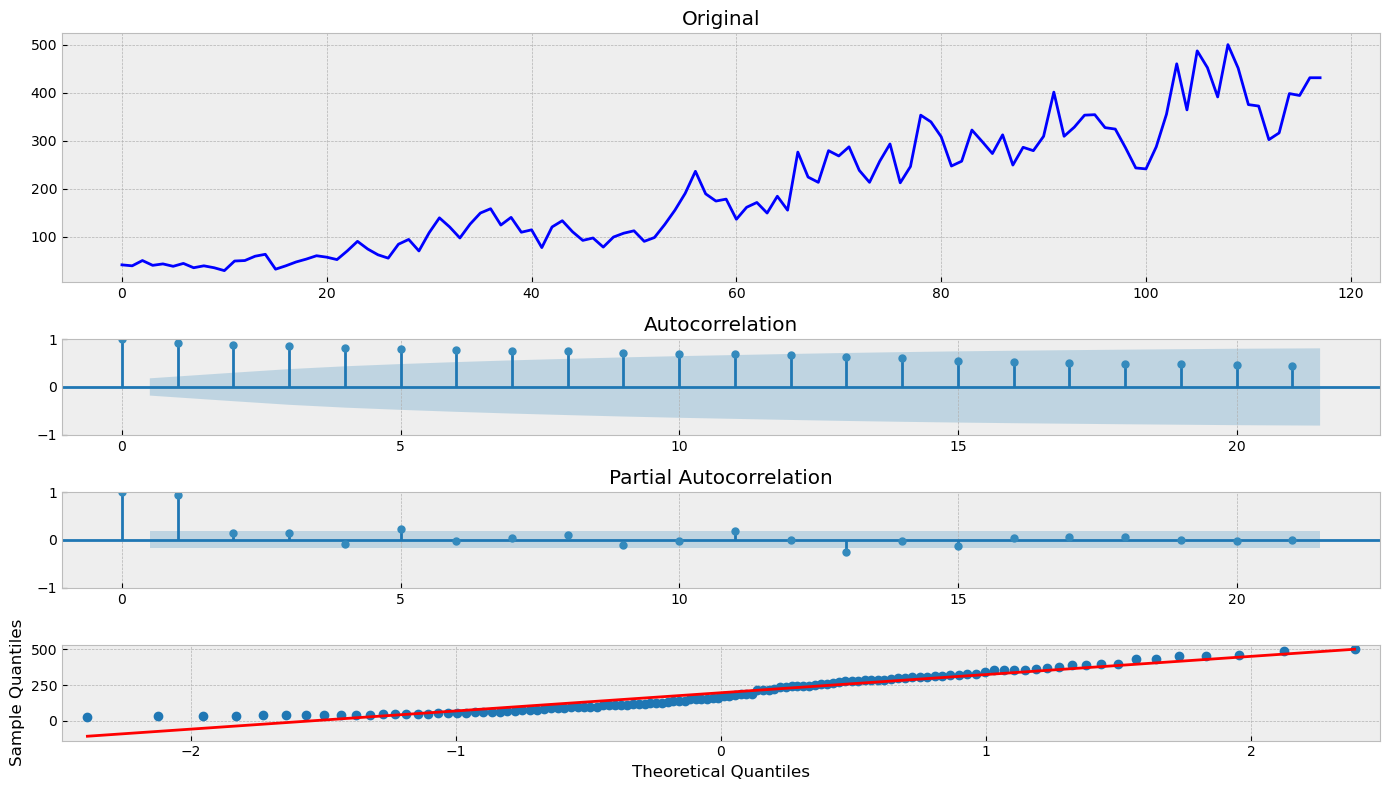

In [37]:
tsplot(robberies_in_boston)

Нестационарный ряд

In [70]:
mdl = smt.ARIMA(robberies_in_boston, order=(2, 1, 2))
res = mdl.fit()

In [71]:
res.aic

1195.857993034039

Results of Dickey-Fuller Test:
Test Statistic                  -3.335258
p-value                          0.013374
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


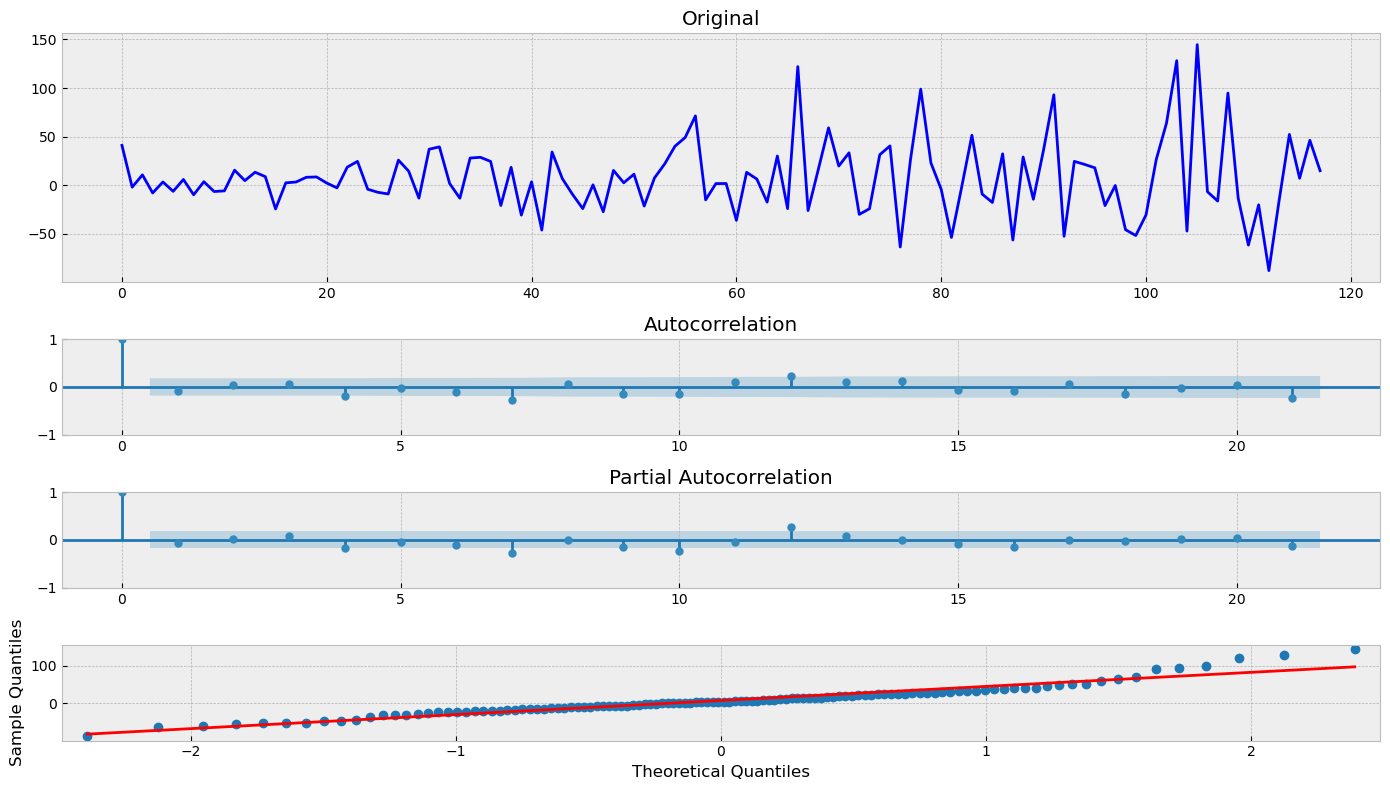

In [72]:
tsplot(res.resid)

Теперь ряд стационарный

In [74]:
import warnings
warnings.filterwarnings("ignore")

In [75]:
best_aic = np.inf 
best_order = None
best_res = None
for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                tmp_mdl = smt.ARIMA(robberies_in_boston, order=(i, d, j))
                tmp_res = tmp_mdl.fit()
                tmp_aic = tmp_res.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_res = tmp_res
            except: continue

print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 1180.69807 | order: (4, 2, 4)


Results of Dickey-Fuller Test:
Test Statistic                -1.083680e+01
p-value                        1.654188e-19
#Lags Used                     0.000000e+00
Number of Observations Used    1.170000e+02
Critical Value (1%)           -3.487517e+00
Critical Value (5%)           -2.886578e+00
Critical Value (10%)          -2.580124e+00
dtype: float64


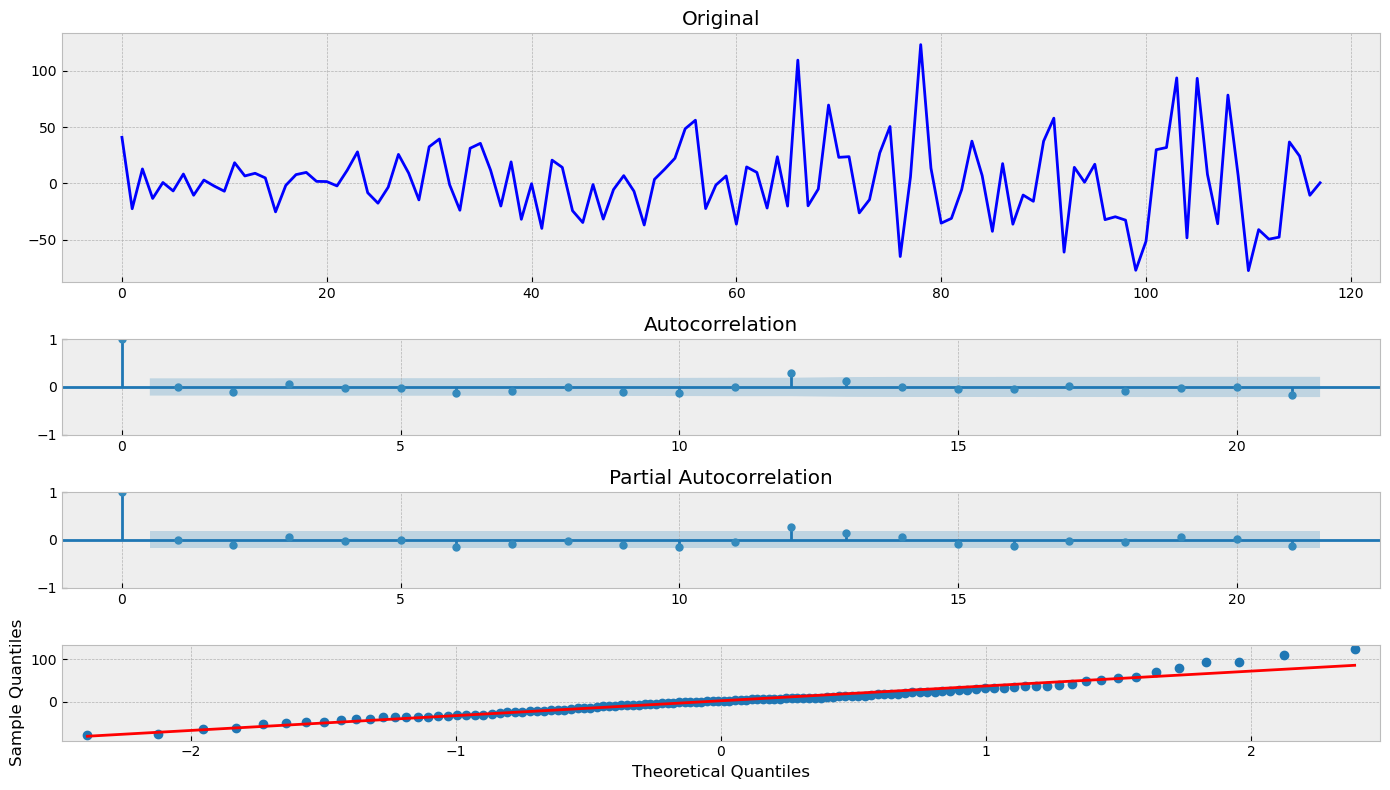

In [76]:
tsplot(best_res.resid)

In [98]:
mdl = smt.ARIMA(robberies_in_boston, order=(4, 2, 4))
rez = mdl.fit()

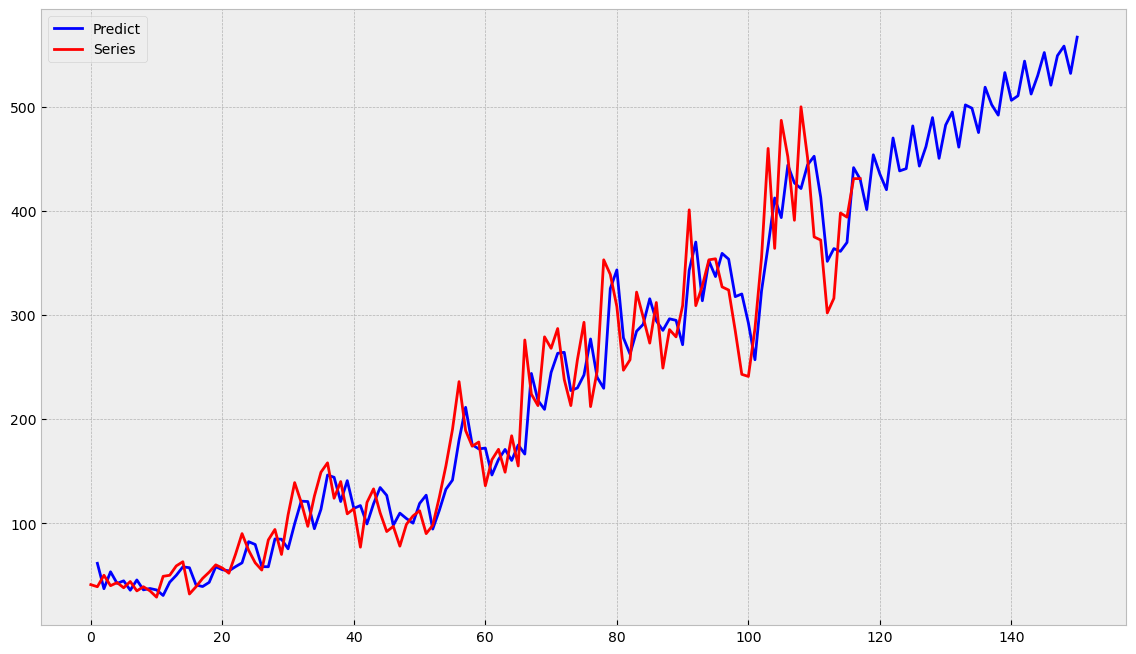

In [104]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    plt.plot(rez.predict(1, 150), color='blue', label='Predict')
    plt.plot(robberies_in_boston, color='red', label='Series')
    plt.legend()
    plt.show()